## Data Exploration and Preprocess

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data_path = "./data/bank-full.csv"
df = pd.read_csv(data_path, sep=";")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
visualize = df.copy()
categorical = ["job", "marital", "education", "default", "housing", "month", "contact", "loan", "poutcome", "y"]

for i in categorical:
    visualize[i] = visualize[i].astype("category").cat.codes

visualize.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0

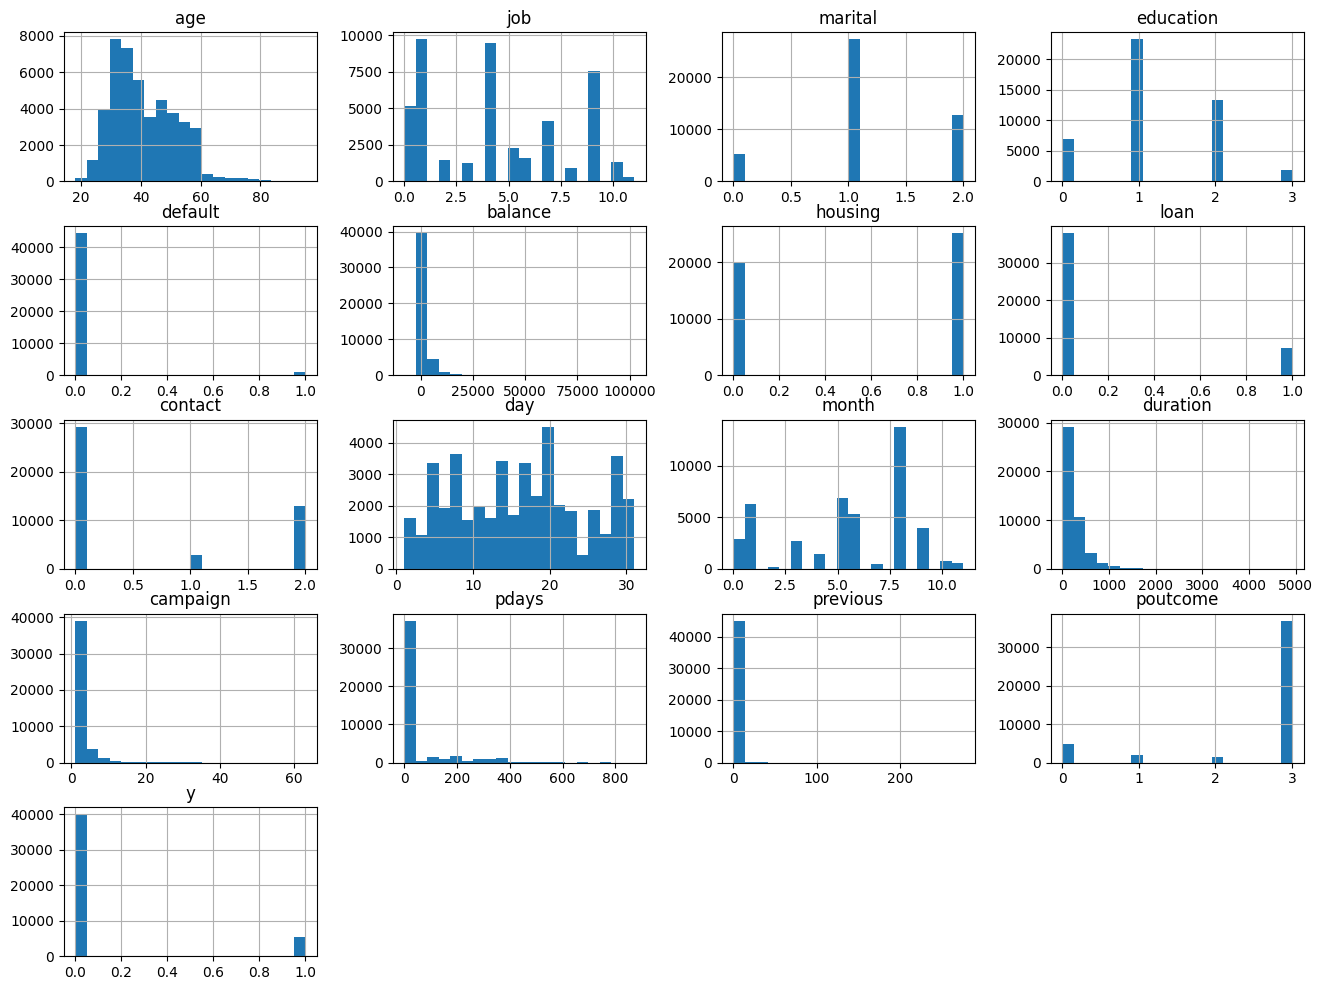

In [4]:
visualize.hist(bins=20, figsize=(16, 12))
plt.show()

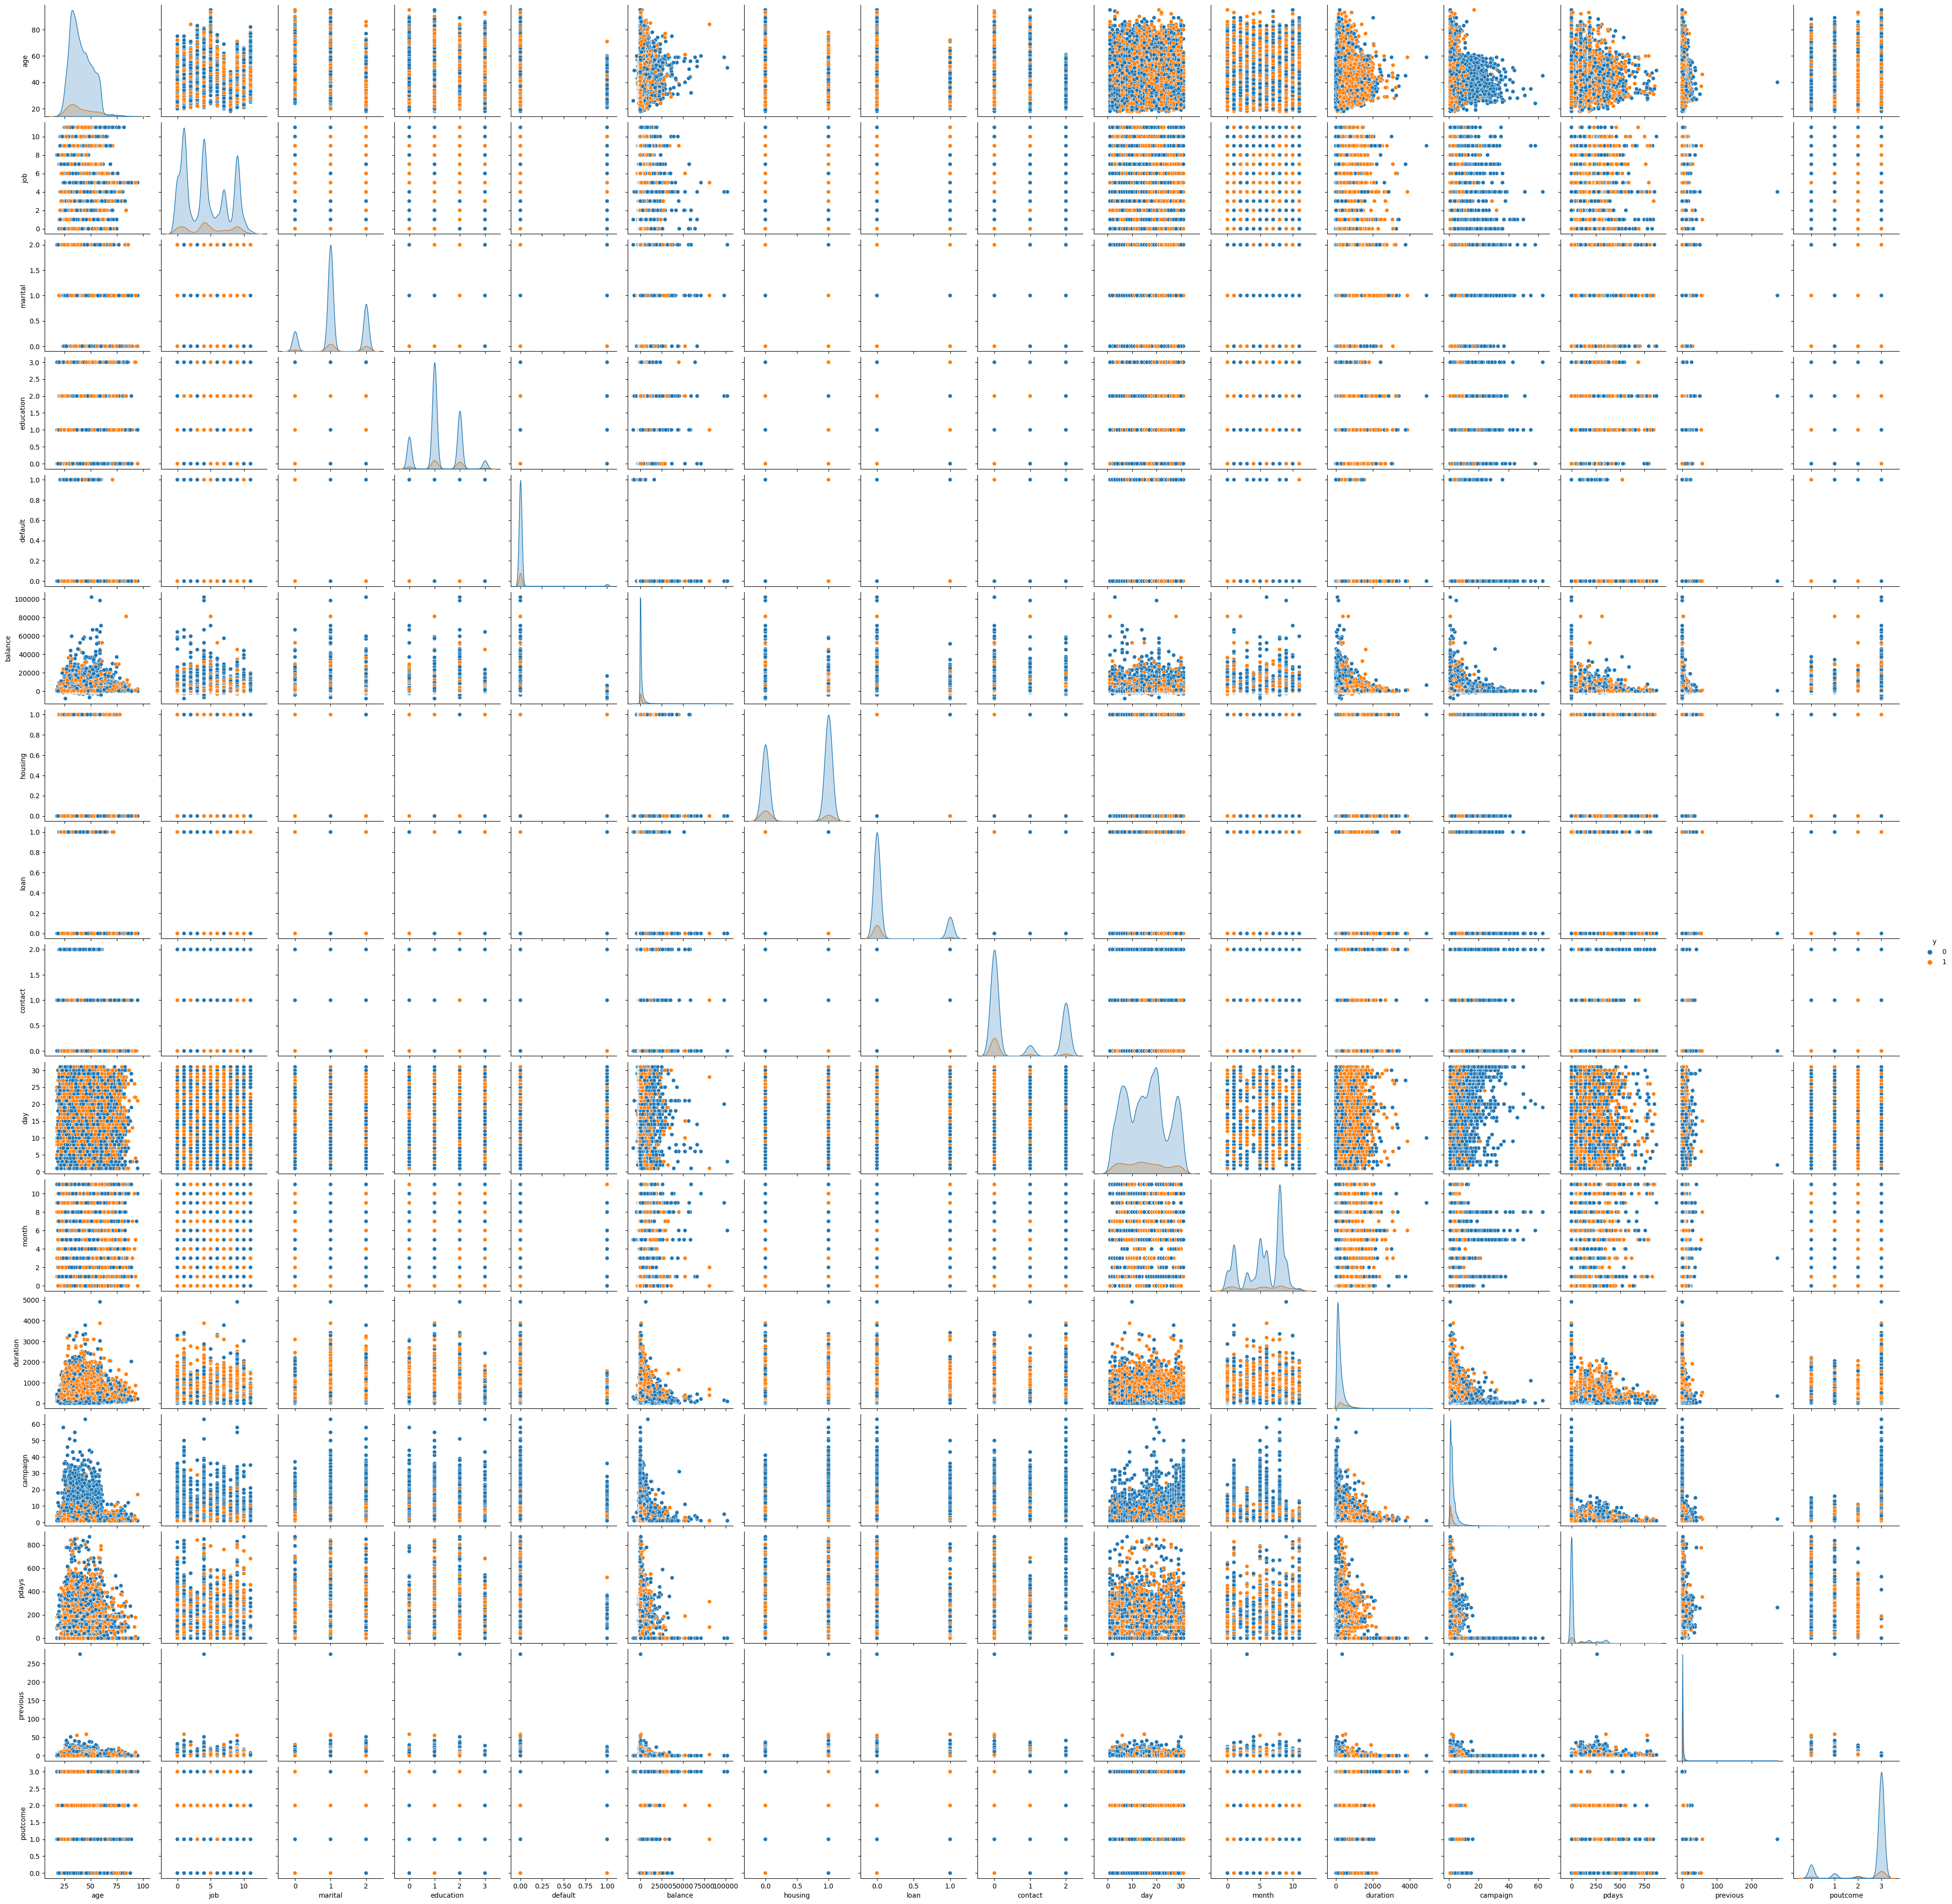

In [5]:
sns.pairplot(visualize, hue="y")
plt.show()

In [6]:
training_df = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "poutcome"])
training_df["y"] = training_df["y"].map({"yes": 1, "no": 0})
training_df["default"] = training_df["default"].map({"yes": 1, "no": 0})
training_df["loan"] = training_df["loan"].map({"yes": 1, "no": 0})
training_df["housing"] = training_df["housing"].map({"yes": 1, "no": 0})
training_df["month"] = training_df["month"].map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})

print("Number of rows", training_df.shape[0])
print("Column names:", training_df.columns, sep="\n")
print("Number of non-null values:", training_df.count(), sep="\n")


Number of rows 45211
Column names:
Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')
Number of non-null values:
age                    45211
default                45211
balance                45211
housing                45211
loan                   45211
day                    45211
month                  45211
duration               45211
campaign   

In [7]:
training_df = training_df / training_df.max()
training_df.describe()

age       default       balance       housing          loan  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.430907      0.018027      0.013339      0.555838      0.160226   
std        0.111776      0.133049      0.029814      0.496878      0.366820   
min        0.189474      0.000000     -0.078520      0.000000      0.000000   
25%        0.347368      0.000000      0.000705      0.000000      0.000000   
50%        0.410526      0.000000      0.004387      1.000000      0.000000   
75%        0.505263      0.000000      0.013983      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                day         month      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.509884      0.512055      0.052494      0.043870      0.046151   
std        0.268467      0.200669      0.052364      0.049175      0.114958   
min        0.032258      0.083333      0.000000      0.015873     -0.001148   
25%        0.258065      0.416667      0.020943      0.015873     -0.001148   
50%        0.516129      0.500000      0.036600      0.031746     -0.001148   
75%        0.677419      0.666667      0.064864      0.047619     -0.001148   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  education_secondary  education_tertiary  education_unknown  \
count  ...         45211.000000        45211.000000       45211.000000   
mean   ...             0.513194            0.294198           0.041074   
std    ...             0.499831            0.455687           0.198464   
min    ...             0.000000            0.000000           0.000000   
25%    ...             0.000000            0.000000           0.000000   
50%    ...             1.000000            0.000000           0.000000   
75%    ...             1.000000            1.000000           0.000000   
max    ...             1.000000            1.000000           1.000000   

       contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
count      45211.000000       45211.000000     45211.000000      45211.000000   
mean           0.647741           0.064276         0.287983          0.108403   
std            0.477680           0.245247         0.452828          0.310892   
min            0.000000           0.000000         0.000000          0.000000   
25%            0.000000           0.000000         0.000000          0.000000   
50%            1.000000           0.000000         0.000000          0.000000   
75%            1.000000           0.000000         1.000000          0.000000   
max            1.000000           1.000000         1.000000          1.000000   

       poutcome_other  poutcome_success  poutcome_unknown  
count    45211.000000      45211.000000      45211.000000  
mean         0.040698          0.033421          0.817478  
std          0.197592          0.179735          0.386278  
min          0.000000          0.000000          0.000000  
25%          0.000000          0.000000          1.000000  
50%          0.000000          0.000000          1.000000  
75%          0.000000          0.000000          1.000000  
max          1.000000          1.000000          1.000000  

[8 rows x 38 columns]

In [8]:
train_x, test_x, train_y, test_y = train_test_split(
    training_df.drop("y", axis=1), training_df["y"], test_size=0.2, random_state=42, shuffle=True
)

## Training SVM Model

In [9]:
from sklearn.svm import SVC

In [10]:
clf = SVC(kernel="poly",verbose=True, C=10, degree=3)

clf.fit(train_x, train_y)

[LibSVM]..........................................................................................................*.......................................................................................*......................................................*
optimization finished, #iter = 247269
obj = -72147.540996, rho = -1.161080
nSV = 8147, nBSV = 6831
Total nSV = 8147


SVC(C=10, kernel='poly', verbose=True)

## Predicting and Evaluating

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
pred_y = clf.predict(test_x)

print("Accuracy:", accuracy_score(test_y, pred_y))
print("Classification report:", classification_report(test_y, pred_y), sep="\n")

Accuracy: 0.8952781156695787
Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      7952
         1.0       0.67      0.26      0.38      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.62      0.66      9043
weighted avg       0.88      0.90      0.87      9043



<Axes: >

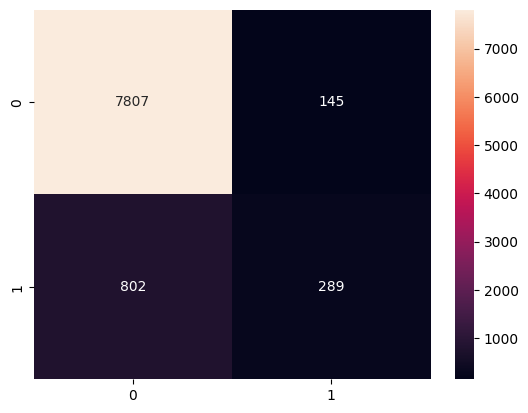

In [13]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt="d")